In [1]:
import os
os.environ["HF_HOME"] = "D:/coding/huggingface_cache"
import tiktoken
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

def num_tokens_from_string(string: str, encoding_name: str) -> int:
    """Returns the number of tokens in a text string."""
    if not isinstance(string, str):
        return 0
    encoding = tiktoken.get_encoding(encoding_name)
    num_tokens = len(encoding.encode(string))
    return num_tokens

encoding_name = "o200k_base"  # GPT-4o, 4.1, 5 encoding
print("Setup complete!")

d:\coding\CS_6303\plot_data\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setup complete!


# Dataset 1: Medical Question Answering (MedQuAD)

In [2]:
# Load MedQuAD dataset
ds1 = load_dataset("medmcqa", split="train")
print(f"Dataset 1 (MedMCQA) loaded: {len(ds1)} samples")
print(f"Columns: {ds1.column_names}")
print("\nFirst sample:")
print(ds1[0])

d:\coding\CS_6303\plot_data\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in D:\coding\huggingface_cache\hub\datasets--medmcqa. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating validation split: 100%|██████████| 4183/4183 [00:00<00:00, 215167.69 examples/s]


Dataset 1 (MedMCQA) loaded: 182822 samples
Columns: ['id', 'question', 'opa', 'opb', 'opc', 'opd', 'cop', 'choice_type', 'exp', 'subject_name', 'topic_name']

First sample:
{'id': 'e9ad821a-c438-4965-9f77-760819dfa155', 'question': 'Chronic urethral obstruction due to benign prismatic hyperplasia can lead to the following change in kidney parenchyma', 'opa': 'Hyperplasia', 'opb': 'Hyperophy', 'opc': 'Atrophy', 'opd': 'Dyplasia', 'cop': 2, 'choice_type': 'single', 'exp': 'Chronic urethral obstruction because of urinary calculi, prostatic hyperophy, tumors, normal pregnancy, tumors, uterine prolapse or functional disorders cause hydronephrosis which by definition is used to describe dilatation of renal pelvis and calculus associated with progressive atrophy of the kidney due to obstruction to the outflow of urine Refer Robbins 7yh/9,1012,9/e. P950', 'subject_name': 'Anatomy', 'topic_name': 'Urinary tract'}


# Dataset 2: Medical Dialogue Dataset

In [4]:
# Load Medical Dialogue dataset
ds2 = load_dataset("medical_dialog", "processed.en", split="train", trust_remote_code=True)
print(f"Dataset 2 (Medical Dialog) loaded: {len(ds2)} samples")
print(f"Columns: {ds2.column_names}")
print("\nFirst sample:")
print(ds2[0])

Generating test split: 100%|██████████| 61/61 [00:00<00:00, 3711.67 examples/s]

Dataset 2 (Medical Dialog) loaded: 482 samples
Columns: ['description', 'utterances']

First sample:
{'description': 'throat a bit sore and want to get a good imune booster, especially in light of the virus. please advise. have not been in contact with nyone with the virus.', 'utterances': ['patient: throat a bit sore and want to get a good imune booster, especially in light of the virus. please advise. have not been in contact with nyone with the virus.', "doctor: during this pandemic. throat pain can be from a strep throat infection (antibiotics needed), a cold or influenza or other virus, or from some other cause such as allergies or irritants. usually, a person sees the doctor (call first) if the sore throat is bothersome, recurrent, or doesn't go away quickly. covid-19 infections tend to have cough, whereas strep throat usually lacks cough but has more throat pain. (3/21/20)"]}


# Dataset 3: PubMed QA

In [5]:
# Load PubMed QA dataset
ds3 = load_dataset("pubmed_qa", "pqa_labeled", split="train", trust_remote_code=True)
print(f"Dataset 3 (PubMed QA) loaded: {len(ds3)} samples")
print(f"Columns: {ds3.column_names}")
print("\nFirst sample:")
print(ds3[0])

d:\coding\CS_6303\plot_data\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in D:\coding\huggingface_cache\hub\datasets--pubmed_qa. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating train split: 100%|██████████| 1000/1000 [00:00<00:00, 73647.59 examples/s]

Dataset 3 (PubMed QA) loaded: 1000 samples
Columns: ['pubid', 'question', 'context', 'long_answer', 'final_decision']

First sample:
{'pubid': 21645374, 'question': 'Do mitochondria play a role in remodelling lace plant leaves during programmed cell death?', 'context': {'contexts': ['Programmed cell death (PCD) is the regulated death of cells within an organism. The lace plant (Aponogeton madagascariensis) produces perforations in its leaves through PCD. The leaves of the plant consist of a latticework of longitudinal and transverse veins enclosing areoles. PCD occurs in the cells at the center of these areoles and progresses outwards, stopping approximately five cells from the vasculature. The role of mitochondria during PCD has been recognized in animals; however, it has been less studied during PCD in plants.', 'The following paper elucidates the role of mitochondrial dynamics during developmentally regulated PCD in vivo in A. madagascariensis. A single areole within a window stage 

# Dataset 4: Medical Meadow Medical Flashcards

In [6]:
# Load Medical Meadow Flashcards dataset
ds4 = load_dataset("medalpaca/medical_meadow_medical_flashcards", split="train")
print(f"Dataset 4 (Medical Meadow Flashcards) loaded: {len(ds4)} samples")
print(f"Columns: {ds4.column_names}")
print("\nFirst sample:")
print(ds4[0])

d:\coding\CS_6303\plot_data\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in D:\coding\huggingface_cache\hub\datasets--medalpaca--medical_meadow_medical_flashcards. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Generating train split: 100%|██████████| 33955/33955 [00:00<00:00, 112832.47 examples/s]

Dataset 4 (Medical Meadow Flashcards) loaded: 33955 samples
Columns: ['input', 'output', 'instruction']

First sample:
{'input': 'What is the relationship between very low Mg2+ levels, PTH levels, and Ca2+ levels?', 'output': 'Very low Mg2+ levels correspond to low PTH levels which in turn results in low Ca2+ levels.', 'instruction': 'Answer this question truthfully'}


# Individual Analysis - Dataset 1: MedMCQA

Processed 1000/182822 samples...
Processed 2000/182822 samples...
Processed 3000/182822 samples...
Processed 4000/182822 samples...
Processed 5000/182822 samples...
Processed 6000/182822 samples...
Processed 7000/182822 samples...
Processed 8000/182822 samples...
Processed 9000/182822 samples...
Processed 10000/182822 samples...
Processed 11000/182822 samples...
Processed 12000/182822 samples...
Processed 13000/182822 samples...
Processed 14000/182822 samples...
Processed 15000/182822 samples...
Processed 16000/182822 samples...
Processed 17000/182822 samples...
Processed 18000/182822 samples...
Processed 19000/182822 samples...
Processed 20000/182822 samples...
Processed 21000/182822 samples...
Processed 22000/182822 samples...
Processed 23000/182822 samples...
Processed 24000/182822 samples...
Processed 25000/182822 samples...
Processed 26000/182822 samples...
Processed 27000/182822 samples...
Processed 28000/182822 samples...
Processed 29000/182822 samples...
Processed 30000/182822 

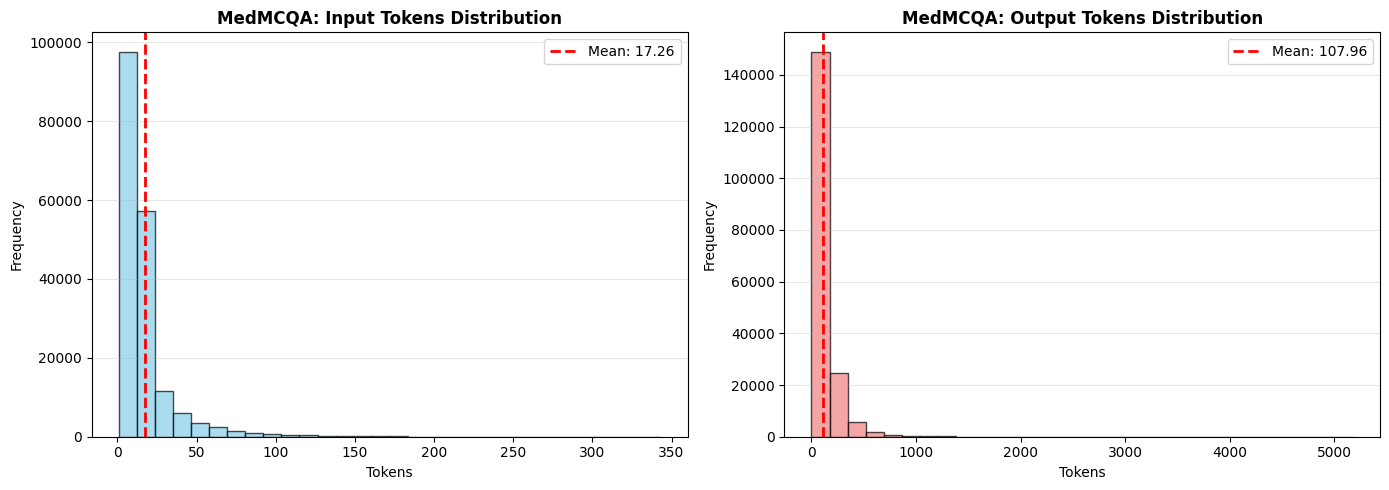

In [7]:
# Analyze MedMCQA dataset (question -> exp)
input_col_1 = 'question'
output_col_1 = 'exp'

results_1 = []
for i in range(len(ds1)):
    input_text = str(ds1[i][input_col_1]) if ds1[i][input_col_1] else ""
    output_text = str(ds1[i][output_col_1]) if ds1[i][output_col_1] else ""
    
    input_tokens = num_tokens_from_string(input_text, encoding_name)
    output_tokens = num_tokens_from_string(output_text, encoding_name)
    
    results_1.append({
        'input_tokens': input_tokens,
        'output_tokens': output_tokens,
        'input_words': len(input_text.split()),
        'output_words': len(output_text.split())
    })
    
    if (i + 1) % 1000 == 0:
        print(f"Processed {i + 1}/{len(ds1)} samples...")

df1 = pd.DataFrame(results_1)

print("="*70)
print("DATASET 1: MEDMCQA RESULTS")
print("="*70)
print(f"Samples: {len(df1)}")
print(f"\nInput ({input_col_1}) Tokens:")
print(f"  Mean: {df1['input_tokens'].mean():.2f}")
print(f"  Min: {df1['input_tokens'].min()}")
print(f"  Max: {df1['input_tokens'].max()}")
print(f"\nOutput ({output_col_1}) Tokens:")
print(f"  Mean: {df1['output_tokens'].mean():.2f}")
print(f"  Min: {df1['output_tokens'].min()}")
print(f"  Max: {df1['output_tokens'].max()}")
print(f"\nDistribution Statistics:")
print(df1.describe())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df1['input_tokens'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('MedMCQA: Input Tokens Distribution', fontweight='bold')
axes[0].set_xlabel('Tokens')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df1['input_tokens'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df1["input_tokens"].mean():.2f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(df1['output_tokens'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title('MedMCQA: Output Tokens Distribution', fontweight='bold')
axes[1].set_xlabel('Tokens')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df1['output_tokens'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df1["output_tokens"].mean():.2f}')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Individual Analysis - Dataset 2: Medical Dialog

DATASET 2: MEDICAL DIALOG RESULTS
Samples: 482

Input (description) Tokens:
  Mean: 29.86
  Min: 4
  Max: 72

Output (utterances) Tokens:
  Mean: 136.57
  Min: 19
  Max: 3187

Distribution Statistics:
       input_tokens  output_tokens  input_words  output_words
count    482.000000     482.000000   482.000000    482.000000
mean      29.856846     136.570539    24.342324    107.867220
std       18.565562     154.093811    14.971110    124.862681
min        4.000000      19.000000     3.000000     14.000000
25%       13.000000      90.000000    10.000000     72.000000
50%       26.000000     116.000000    22.000000     92.500000
75%       47.000000     150.000000    38.750000    118.750000
max       72.000000    3187.000000    57.000000   2588.000000


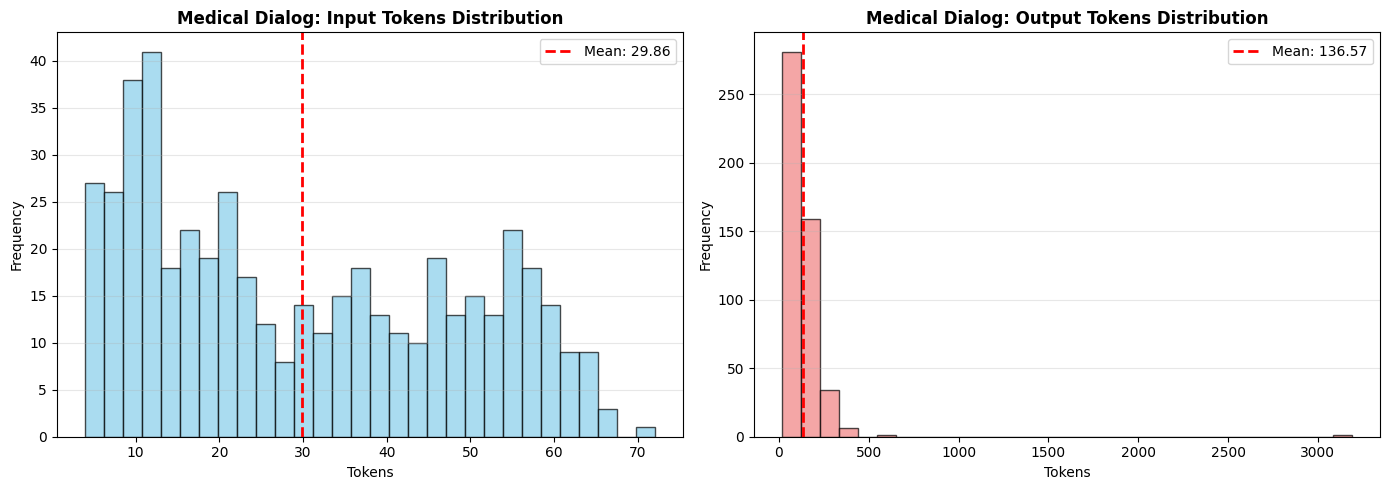

In [8]:
# Analyze Medical Dialog dataset (description -> utterances)
input_col_2 = 'description'
output_col_2 = 'utterances'

results_2 = []
for i in range(len(ds2)):
    input_text = str(ds2[i][input_col_2]) if ds2[i][input_col_2] else ""
    
    # Handle utterances as list or string
    utterances = ds2[i][output_col_2]
    if isinstance(utterances, list):
        output_text = " ".join([str(u) for u in utterances if u])
    else:
        output_text = str(utterances) if utterances else ""
    
    input_tokens = num_tokens_from_string(input_text, encoding_name)
    output_tokens = num_tokens_from_string(output_text, encoding_name)
    
    results_2.append({
        'input_tokens': input_tokens,
        'output_tokens': output_tokens,
        'input_words': len(input_text.split()),
        'output_words': len(output_text.split())
    })
    
    if (i + 1) % 1000 == 0:
        print(f"Processed {i + 1}/{len(ds2)} samples...")

df2 = pd.DataFrame(results_2)

print("="*70)
print("DATASET 2: MEDICAL DIALOG RESULTS")
print("="*70)
print(f"Samples: {len(df2)}")
print(f"\nInput ({input_col_2}) Tokens:")
print(f"  Mean: {df2['input_tokens'].mean():.2f}")
print(f"  Min: {df2['input_tokens'].min()}")
print(f"  Max: {df2['input_tokens'].max()}")
print(f"\nOutput ({output_col_2}) Tokens:")
print(f"  Mean: {df2['output_tokens'].mean():.2f}")
print(f"  Min: {df2['output_tokens'].min()}")
print(f"  Max: {df2['output_tokens'].max()}")
print(f"\nDistribution Statistics:")
print(df2.describe())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df2['input_tokens'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Medical Dialog: Input Tokens Distribution', fontweight='bold')
axes[0].set_xlabel('Tokens')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df2['input_tokens'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df2["input_tokens"].mean():.2f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(df2['output_tokens'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title('Medical Dialog: Output Tokens Distribution', fontweight='bold')
axes[1].set_xlabel('Tokens')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df2['output_tokens'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df2["output_tokens"].mean():.2f}')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Individual Analysis - Dataset 3: PubMed QA

Processed 1000/1000 samples...
DATASET 3: PUBMED QA RESULTS
Samples: 1000

Input (question + context) Tokens:
  Mean: 313.23
  Min: 70
  Max: 717

Output (long_answer) Tokens:
  Mean: 49.43
  Min: 9
  Max: 150

Distribution Statistics:
       input_tokens  output_tokens  input_words  output_words
count   1000.000000    1000.000000  1000.000000   1000.000000
mean     313.226000      49.432000   213.120000     39.660000
std       88.151822      21.160414    52.504975     17.209432
min       70.000000       9.000000    58.000000      8.000000
25%      251.750000      34.000000   180.000000     27.000000
50%      309.500000      46.500000   213.500000     37.000000
75%      367.000000      61.000000   243.000000     49.000000
max      717.000000     150.000000   412.000000    126.000000


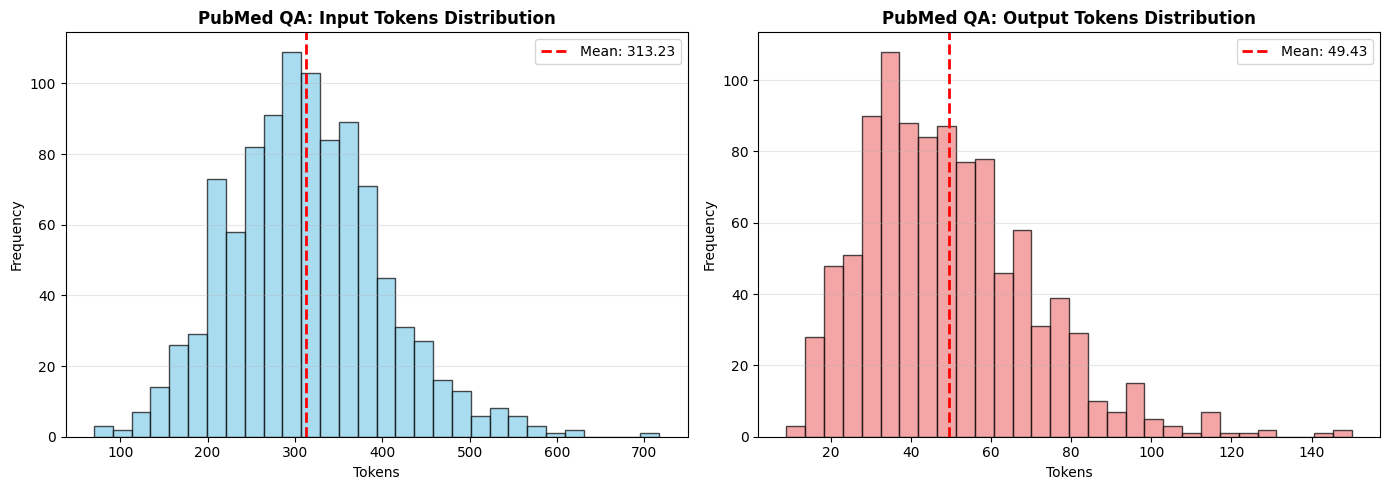

In [9]:
# Analyze PubMed QA dataset (question + context -> long_answer)
input_col_3_a = 'question'
input_col_3_b = 'context'
output_col_3 = 'long_answer'

results_3 = []
for i in range(len(ds3)):
    question = str(ds3[i][input_col_3_a]) if ds3[i][input_col_3_a] else ""
    
    # Handle context as dict with contexts
    context = ds3[i][input_col_3_b]
    if isinstance(context, dict) and 'contexts' in context:
        context_text = " ".join([str(c) for c in context['contexts'] if c])
    else:
        context_text = str(context) if context else ""
    
    input_text = question + " " + context_text
    output_text = str(ds3[i][output_col_3]) if ds3[i][output_col_3] else ""
    
    input_tokens = num_tokens_from_string(input_text, encoding_name)
    output_tokens = num_tokens_from_string(output_text, encoding_name)
    
    results_3.append({
        'input_tokens': input_tokens,
        'output_tokens': output_tokens,
        'input_words': len(input_text.split()),
        'output_words': len(output_text.split())
    })
    
    if (i + 1) % 1000 == 0:
        print(f"Processed {i + 1}/{len(ds3)} samples...")

df3 = pd.DataFrame(results_3)

print("="*70)
print("DATASET 3: PUBMED QA RESULTS")
print("="*70)
print(f"Samples: {len(df3)}")
print(f"\nInput (question + context) Tokens:")
print(f"  Mean: {df3['input_tokens'].mean():.2f}")
print(f"  Min: {df3['input_tokens'].min()}")
print(f"  Max: {df3['input_tokens'].max()}")
print(f"\nOutput ({output_col_3}) Tokens:")
print(f"  Mean: {df3['output_tokens'].mean():.2f}")
print(f"  Min: {df3['output_tokens'].min()}")
print(f"  Max: {df3['output_tokens'].max()}")
print(f"\nDistribution Statistics:")
print(df3.describe())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df3['input_tokens'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('PubMed QA: Input Tokens Distribution', fontweight='bold')
axes[0].set_xlabel('Tokens')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df3['input_tokens'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df3["input_tokens"].mean():.2f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(df3['output_tokens'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title('PubMed QA: Output Tokens Distribution', fontweight='bold')
axes[1].set_xlabel('Tokens')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df3['output_tokens'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df3["output_tokens"].mean():.2f}')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Individual Analysis - Dataset 4: Medical Meadow Flashcards

Processed 1000/33955 samples...
Processed 2000/33955 samples...
Processed 3000/33955 samples...
Processed 4000/33955 samples...
Processed 5000/33955 samples...
Processed 6000/33955 samples...
Processed 7000/33955 samples...
Processed 8000/33955 samples...
Processed 9000/33955 samples...
Processed 10000/33955 samples...
Processed 11000/33955 samples...
Processed 12000/33955 samples...
Processed 13000/33955 samples...
Processed 14000/33955 samples...
Processed 15000/33955 samples...
Processed 16000/33955 samples...
Processed 17000/33955 samples...
Processed 18000/33955 samples...
Processed 19000/33955 samples...
Processed 20000/33955 samples...
Processed 21000/33955 samples...
Processed 22000/33955 samples...
Processed 23000/33955 samples...
Processed 24000/33955 samples...
Processed 25000/33955 samples...
Processed 26000/33955 samples...
Processed 27000/33955 samples...
Processed 28000/33955 samples...
Processed 29000/33955 samples...
Processed 30000/33955 samples...
Processed 31000/339

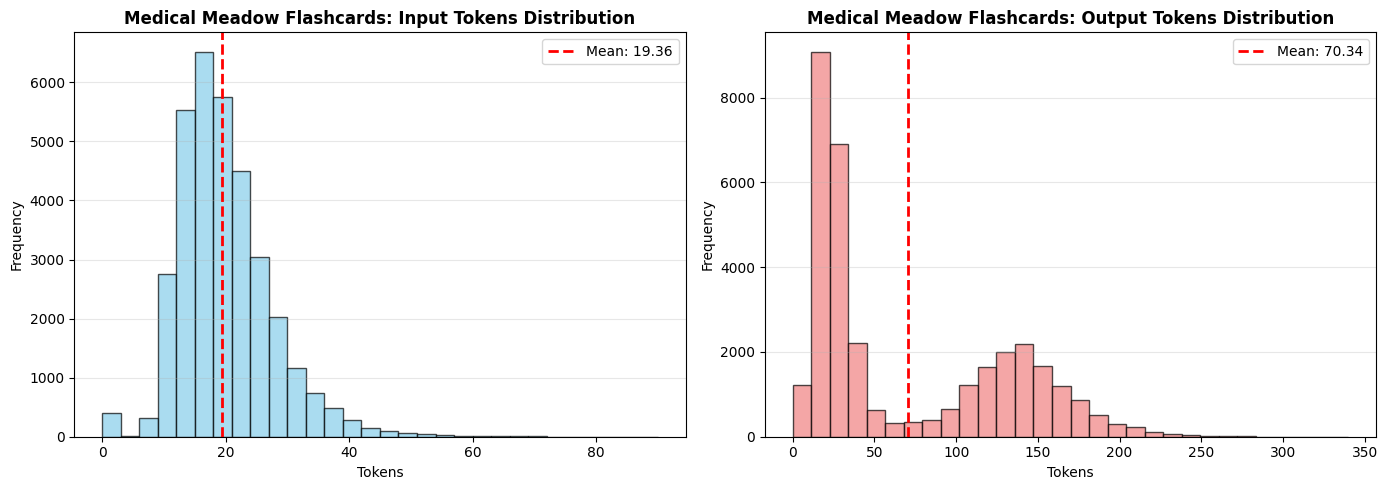

In [10]:
# Analyze Medical Meadow Flashcards dataset (input -> output)
input_col_4 = 'input'
output_col_4 = 'output'

results_4 = []
for i in range(len(ds4)):
    input_text = str(ds4[i][input_col_4]) if ds4[i][input_col_4] else ""
    output_text = str(ds4[i][output_col_4]) if ds4[i][output_col_4] else ""
    
    input_tokens = num_tokens_from_string(input_text, encoding_name)
    output_tokens = num_tokens_from_string(output_text, encoding_name)
    
    results_4.append({
        'input_tokens': input_tokens,
        'output_tokens': output_tokens,
        'input_words': len(input_text.split()),
        'output_words': len(output_text.split())
    })
    
    if (i + 1) % 1000 == 0:
        print(f"Processed {i + 1}/{len(ds4)} samples...")

df4 = pd.DataFrame(results_4)

print("="*70)
print("DATASET 4: MEDICAL MEADOW FLASHCARDS RESULTS")
print("="*70)
print(f"Samples: {len(df4)}")
print(f"\nInput ({input_col_4}) Tokens:")
print(f"  Mean: {df4['input_tokens'].mean():.2f}")
print(f"  Min: {df4['input_tokens'].min()}")
print(f"  Max: {df4['input_tokens'].max()}")
print(f"\nOutput ({output_col_4}) Tokens:")
print(f"  Mean: {df4['output_tokens'].mean():.2f}")
print(f"  Min: {df4['output_tokens'].min()}")
print(f"  Max: {df4['output_tokens'].max()}")
print(f"\nDistribution Statistics:")
print(df4.describe())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].hist(df4['input_tokens'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Medical Meadow Flashcards: Input Tokens Distribution', fontweight='bold')
axes[0].set_xlabel('Tokens')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df4['input_tokens'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df4["input_tokens"].mean():.2f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

axes[1].hist(df4['output_tokens'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title('Medical Meadow Flashcards: Output Tokens Distribution', fontweight='bold')
axes[1].set_xlabel('Tokens')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df4['output_tokens'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df4["output_tokens"].mean():.2f}')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Combined Analysis - All Medical Domain Datasets

In [11]:
# Combine all datasets
df1['dataset'] = 'MedMCQA'
df2['dataset'] = 'Medical Dialog'
df3['dataset'] = 'PubMed QA'
df4['dataset'] = 'Medical Meadow Flashcards'

df_combined = pd.concat([df1, df2, df3, df4], ignore_index=True)

print("="*70)
print("COMBINED MEDICAL DOMAIN ANALYSIS")
print("="*70)
print(f"Total samples across all datasets: {len(df_combined)}")
print(f"\nBreakdown by dataset:")
print(df_combined['dataset'].value_counts())

print(f"\nCombined Input Tokens Statistics:")
print(f"  Mean: {df_combined['input_tokens'].mean():.2f}")
print(f"  Median: {df_combined['input_tokens'].median():.2f}")
print(f"  Std: {df_combined['input_tokens'].std():.2f}")
print(f"  Min: {df_combined['input_tokens'].min()}")
print(f"  Max: {df_combined['input_tokens'].max()}")

print(f"\nCombined Output Tokens Statistics:")
print(f"  Mean: {df_combined['output_tokens'].mean():.2f}")
print(f"  Median: {df_combined['output_tokens'].median():.2f}")
print(f"  Std: {df_combined['output_tokens'].std():.2f}")
print(f"  Min: {df_combined['output_tokens'].min()}")
print(f"  Max: {df_combined['output_tokens'].max()}")

print(f"\nFull Distribution Statistics:")
print(df_combined[['input_tokens', 'output_tokens', 'input_words', 'output_words']].describe())

# Per-dataset summary
print(f"\n" + "="*70)
print("PER-DATASET SUMMARY")
print("="*70)
summary = df_combined.groupby('dataset').agg({
    'input_tokens': ['mean', 'min', 'max'],
    'output_tokens': ['mean', 'min', 'max']
}).round(2)
print(summary)

COMBINED MEDICAL DOMAIN ANALYSIS
Total samples across all datasets: 218259

Breakdown by dataset:
dataset
MedMCQA                      182822
Medical Meadow Flashcards     33955
PubMed QA                      1000
Medical Dialog                  482
Name: count, dtype: int64

Combined Input Tokens Statistics:
  Mean: 18.97
  Median: 13.00
  Std: 26.52
  Min: 0
  Max: 717

Combined Output Tokens Statistics:
  Mean: 101.90
  Median: 68.00
  Std: 130.61
  Min: 0
  Max: 5177

Full Distribution Statistics:
        input_tokens  output_tokens    input_words   output_words
count  218259.000000  218259.000000  218259.000000  218259.000000
mean       18.972450     101.904609      13.999198      65.203116
std        26.517919     130.606321      18.445188      82.769929
min         0.000000       0.000000       0.000000       0.000000
25%         9.000000      22.000000       7.000000      14.000000
50%        13.000000      68.000000      10.000000      42.000000
75%        19.000000     137.00

# Combined Visualization - All Datasets

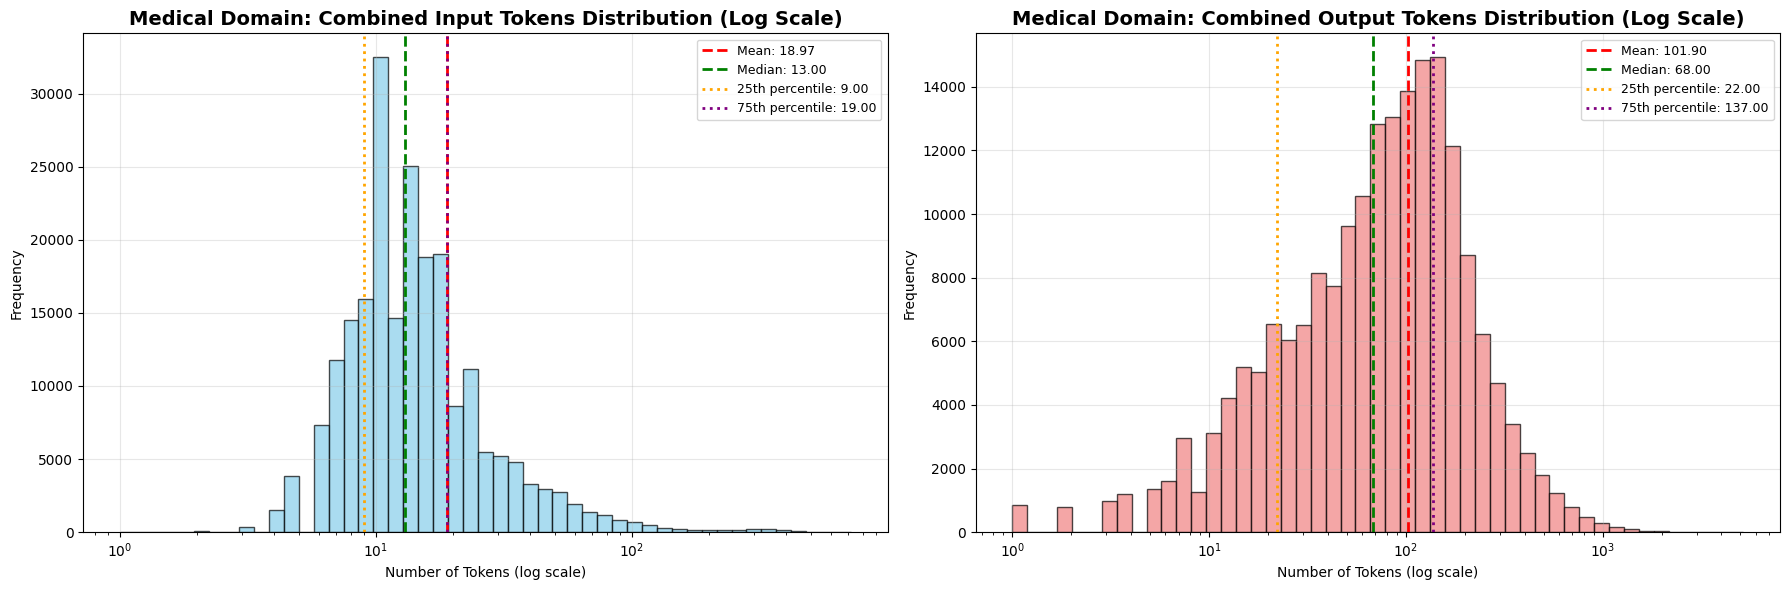

Enhanced visualizations complete!

Key Insights:
Input tokens - 25th percentile: 9, Median: 13, 75th percentile: 19
Output tokens - 25th percentile: 22, Median: 68, 75th percentile: 137


In [12]:
# Enhanced combined distribution visualizations
import numpy as np

# Create figure with 2 histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Calculate percentiles
input_p25 = df_combined['input_tokens'].quantile(0.25)
input_p75 = df_combined['input_tokens'].quantile(0.75)
output_p25 = df_combined['output_tokens'].quantile(0.25)
output_p75 = df_combined['output_tokens'].quantile(0.75)

# ========== INPUT TOKENS HISTOGRAM (LOG SCALE) ==========
# Use logarithmic bins
input_bins = np.logspace(np.log10(max(1, df_combined['input_tokens'].min())), 
                         np.log10(df_combined['input_tokens'].max()), 50)
axes[0].hist(df_combined['input_tokens'], bins=input_bins, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xscale('log')
axes[0].set_title('Medical Domain: Combined Input Tokens Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Tokens (log scale)')
axes[0].set_ylabel('Frequency')

# Add statistical lines
axes[0].axvline(df_combined['input_tokens'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {df_combined["input_tokens"].mean():.2f}')
axes[0].axvline(df_combined['input_tokens'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Median: {df_combined["input_tokens"].median():.2f}')
axes[0].axvline(input_p25, color='orange', linestyle=':', linewidth=2, 
            label=f'25th percentile: {input_p25:.2f}')
axes[0].axvline(input_p75, color='purple', linestyle=':', linewidth=2, 
            label=f'75th percentile: {input_p75:.2f}')
axes[0].legend(fontsize=9)
axes[0].grid(axis='both', alpha=0.3)

# ========== OUTPUT TOKENS HISTOGRAM (LOG SCALE) ==========
output_bins = np.logspace(np.log10(max(1, df_combined['output_tokens'].min())), 
                          np.log10(df_combined['output_tokens'].max()), 50)
axes[1].hist(df_combined['output_tokens'], bins=output_bins, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_xscale('log')
axes[1].set_title('Medical Domain: Combined Output Tokens Distribution (Log Scale)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Tokens (log scale)')
axes[1].set_ylabel('Frequency')

# Add statistical lines
axes[1].axvline(df_combined['output_tokens'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: {df_combined["output_tokens"].mean():.2f}')
axes[1].axvline(df_combined['output_tokens'].median(), color='green', linestyle='--', linewidth=2, 
            label=f'Median: {df_combined["output_tokens"].median():.2f}')
axes[1].axvline(output_p25, color='orange', linestyle=':', linewidth=2, 
            label=f'25th percentile: {output_p25:.2f}')
axes[1].axvline(output_p75, color='purple', linestyle=':', linewidth=2, 
            label=f'75th percentile: {output_p75:.2f}')
axes[1].legend(fontsize=9)
axes[1].grid(axis='both', alpha=0.3)

plt.tight_layout()
plt.show()

print("Enhanced visualizations complete!")
print(f"\nKey Insights:")
print(f"Input tokens - 25th percentile: {input_p25:.0f}, Median: {df_combined['input_tokens'].median():.0f}, 75th percentile: {input_p75:.0f}")
print(f"Output tokens - 25th percentile: {output_p25:.0f}, Median: {df_combined['output_tokens'].median():.0f}, 75th percentile: {output_p75:.0f}")

# Export Results

In [ ]:
# Export combined results to Excel
df_combined.to_excel('medical_domain_token_analysis.xlsx', index=False)
print("Results exported to 'medical_domain_token_analysis.xlsx'")

# Export summary statistics
summary_stats = df_combined.groupby('dataset').agg({
    'input_tokens': ['count', 'mean', 'std', 'min', 'max'],
    'output_tokens': ['mean', 'std', 'min', 'max'],
    'input_words': ['mean'],
    'output_words': ['mean']
}).round(2)

summary_stats.to_excel('medical_domain_summary_stats.xlsx')
print("Summary statistics exported to 'medical_domain_summary_stats.xlsx'")